<a href="https://colab.research.google.com/github/gowtamyreddy/Deeplearning_projects/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gowtamy","key":"636b1aeb29496731796fbb195f0994fa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other


In [ ]:
!unzip celeba-dataset.zip -d celeb_data/


Streaming output truncated to the last 5000 lines.
  inflating: celeb_data/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: celeb_data/img_align_celeba/img_align_celeba/197617.jpg  
  inflating: celeb_data/im

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
transform = transforms.Compose([
    transforms.CenterCrop(128),          # Crop to face region
    transforms.Resize(64),               # Resize to 64x64
    transforms.ToTensor(),               # Convert to tensor
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize to [-1, 1]
])


In [ ]:
dataset = datasets.ImageFolder(root='celeb_data', transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)


In [ ]:
#GAN
#Generator
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
#Discriminator

class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 64, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(64, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128,256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(256,512, 4, 2, 1, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(512, 1, 4, 1, 0, bias=False),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x).view(-1, 1)

In [ ]:
#Training
import torch
import torchvision.utils as vutils
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Instantiaite models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

#Loss functions
criterion = nn.BCELoss()

#Optimizers
lr = 0.0002
betal1 = 0.5
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(betal1, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(betal1, 0.999))

#Fxing noise to vizualize process
fixed_noise = torch.randn(64, 100, 1, 1, device=device)


#create output dir
os.makedirs('output', exist_ok=True)

In [ ]:
import os
os.makedirs("generated_samples", exist_ok=True)


✅ Epoch [1/15] | Time: 497.73s
   ⤷ Generator Loss:     4.0760
   ⤷ Discriminator Loss: 0.6755
✅ Epoch [2/15] | Time: 490.50s
   ⤷ Generator Loss:     3.4777
   ⤷ Discriminator Loss: 0.6012
✅ Epoch [3/15] | Time: 491.36s
   ⤷ Generator Loss:     3.9414
   ⤷ Discriminator Loss: 0.4618
✅ Epoch [4/15] | Time: 487.43s
   ⤷ Generator Loss:     4.4575
   ⤷ Discriminator Loss: 0.3731
✅ Epoch [5/15] | Time: 484.83s
   ⤷ Generator Loss:     4.7693
   ⤷ Discriminator Loss: 0.2995


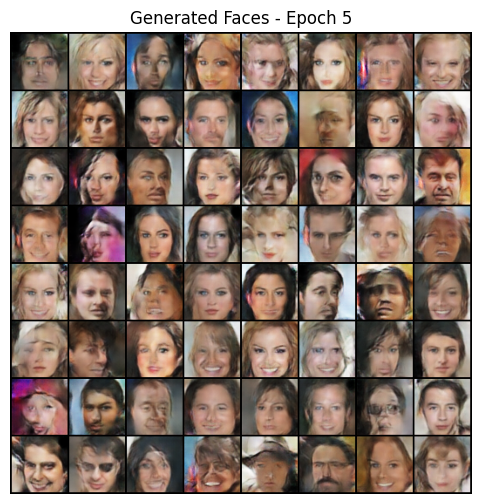

✅ Epoch [6/15] | Time: 486.55s
   ⤷ Generator Loss:     4.9829
   ⤷ Discriminator Loss: 0.2679
✅ Epoch [7/15] | Time: 486.57s
   ⤷ Generator Loss:     4.9264
   ⤷ Discriminator Loss: 0.2850
✅ Epoch [8/15] | Time: 486.79s
   ⤷ Generator Loss:     4.8796
   ⤷ Discriminator Loss: 0.2774
✅ Epoch [9/15] | Time: 486.82s
   ⤷ Generator Loss:     5.0566
   ⤷ Discriminator Loss: 0.2683
✅ Epoch [10/15] | Time: 486.34s
   ⤷ Generator Loss:     4.9681
   ⤷ Discriminator Loss: 0.2431


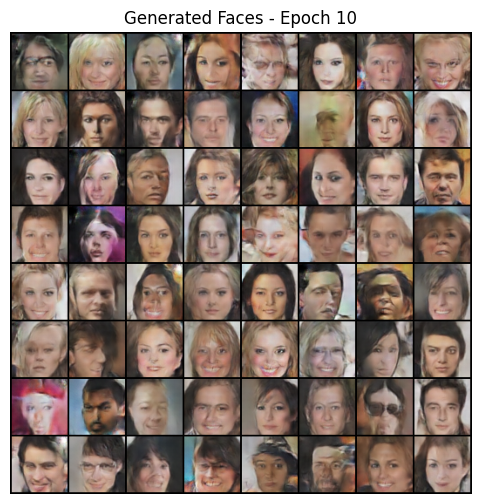

✅ Epoch [11/15] | Time: 486.69s
   ⤷ Generator Loss:     4.9927
   ⤷ Discriminator Loss: 0.2579
✅ Epoch [12/15] | Time: 486.77s
   ⤷ Generator Loss:     4.9352
   ⤷ Discriminator Loss: 0.2573
✅ Epoch [13/15] | Time: 485.66s
   ⤷ Generator Loss:     4.9410
   ⤷ Discriminator Loss: 0.2610
✅ Epoch [14/15] | Time: 486.59s
   ⤷ Generator Loss:     4.9185
   ⤷ Discriminator Loss: 0.2771
✅ Epoch [15/15] | Time: 486.21s
   ⤷ Generator Loss:     5.1973
   ⤷ Discriminator Loss: 0.2349


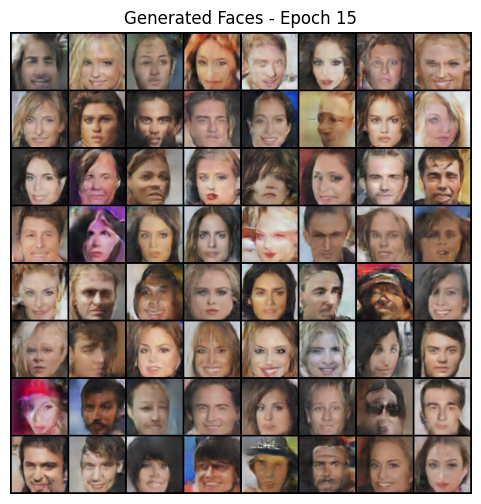


🎉 Training completed in 121.97 minutes.


In [ ]:
import time
import matplotlib.pyplot as plt
import torchvision.utils as vutils

no_of_epochs = 15
g_losses = []
d_losses = []

start_time = time.time()

for epoch in range(no_of_epochs):
    epoch_start = time.time()
    g_loss_epoch = 0
    d_loss_epoch = 0
    num_batches = 0

    for i, (images, _) in enumerate(dataloader):
        batch_size = images.size(0)
        real_images = images.to(device)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ===== Train Discriminator =====
        discriminator.zero_grad()

        real_output = discriminator(real_images)
        real_loss = criterion(real_output, real_labels)

        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images.detach())
        fake_loss = criterion(fake_output, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # ===== Train Generator =====
        generator.zero_grad()
        output = discriminator(fake_images)
        g_loss = criterion(output, real_labels)
        g_loss.backward()
        optimizer_G.step()

        # Track losses
        g_loss_epoch += g_loss.item()
        d_loss_epoch += d_loss.item()
        num_batches += 1

    # Average epoch loss
    avg_g_loss = g_loss_epoch / num_batches
    avg_d_loss = d_loss_epoch / num_batches
    g_losses.append(avg_g_loss)
    d_losses.append(avg_d_loss)

    # Print progress
    epoch_time = time.time() - epoch_start
    print(f"✅ Epoch [{epoch+1}/{no_of_epochs}] | Time: {epoch_time:.2f}s")
    print(f"   ⤷ Generator Loss:     {avg_g_loss:.4f}")
    print(f"   ⤷ Discriminator Loss: {avg_d_loss:.4f}")

    # Save and preview generated images
    if (epoch+1) % 5 == 0 or epoch == no_of_epochs - 1:
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
        grid = vutils.make_grid(fake, normalize=True, nrow=8) # grid is created here
        vutils.save_image(grid, f"generated_samples/sample_epoch_{epoch+1}.png") # grid is saved here, inside the loop, after being defined

        # Optional inline preview
        plt.figure(figsize=(6,6))
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis("off")
        plt.title(f"Generated Faces - Epoch {epoch+1}")
        plt.show()

# Total time
total_time = time.time() - start_time
print(f"\n🎉 Training completed in {total_time/60:.2f} minutes.")

In [ ]:
!pip install -q huggingface_hub

from huggingface_hub import notebook_login
notebook_login()


In [ ]:
from huggingface_hub import notebook_login
import torch

# Assuming you want to save the generator model
# Replace 'generator' with 'discriminator' if you want to save the discriminator instead
torch.save(generator.state_dict(), "generator_GAN.pth")
# It is recommended to use .pth extension for PyTorch model files

In [ ]:
notebook_login()


In [ ]:
#creating repo
from huggingface_hub import HfApi

repo_id = 'Gowtamy/GAN_Celeb'
api = HfApi()
api.create_repo(repo_id=repo_id, repo_type='model')

RepoUrl('https://huggingface.co/Gowtamy/GAN_Celeb', endpoint='https://huggingface.co', repo_type='model', repo_id='Gowtamy/GAN_Celeb')

In [ ]:
from huggingface_hub import upload_folder

# Assuming 'generator_GAN.pth' is your model file within the current directory
upload_folder(
    repo_id=repo_id,
    folder_path=".",  # Current directory
    path_in_repo=".",  # Root of the repo
    repo_type="model",
    allow_patterns="*.pth",  # Only include .pth files
)

generator_GAN.pth:   0%|          | 0.00/14.3M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Gowtamy/GAN_Celeb/commit/1466b6b590079ea4b6bc6510ecb057ad5e64b1f1', commit_message='Upload folder using huggingface_hub', commit_description='', oid='1466b6b590079ea4b6bc6510ecb057ad5e64b1f1', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Gowtamy/GAN_Celeb', endpoint='https://huggingface.co', repo_type='model', repo_id='Gowtamy/GAN_Celeb'), pr_revision=None, pr_num=None)